<a href="https://colab.research.google.com/github/12tilak34/Fintechstartup/blob/main/StageAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


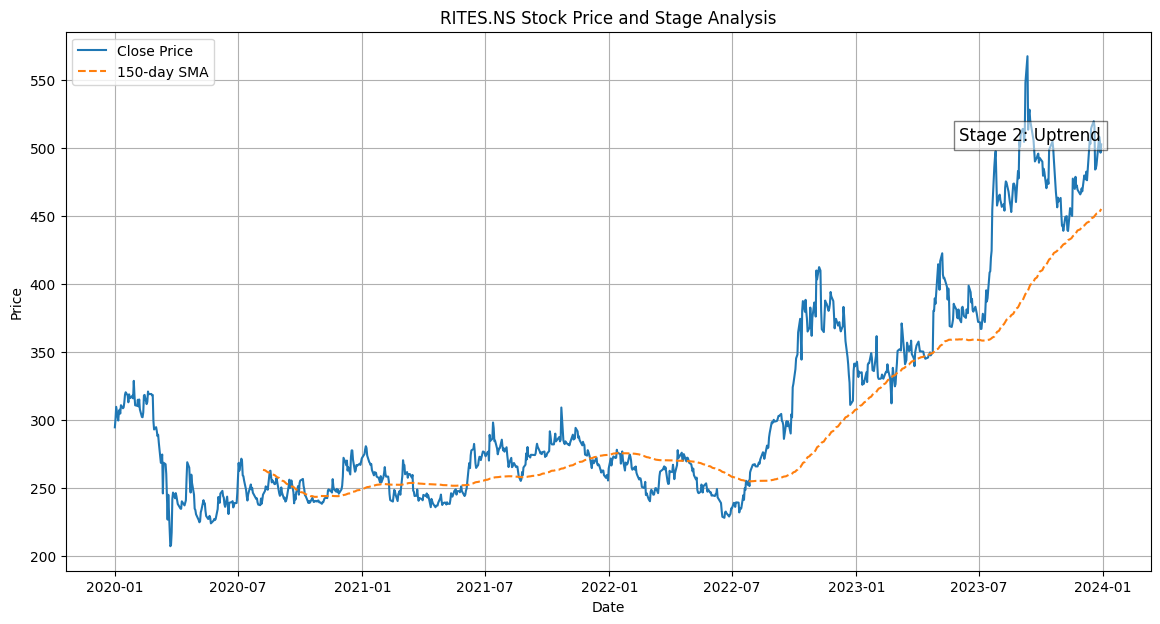

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def identify_stage(data):
    data['SMA'] = data['Close'].rolling(window=150).mean()
    last_close = data['Close'].iloc[-1]
    last_sma = data['SMA'].iloc[-1]
    if last_close > last_sma:
        if data['Close'].iloc[-1] > data['Close'].iloc[-150]:
            return 'Stage 2: Uptrend'
        else:
            return 'Stage 3: Distribution'
    else:
        if data['Close'].iloc[-1] < data['Close'].iloc[-150]:
            return 'Stage 4: Downtrend'
        else:
            return 'Stage 1: Accumulation'

ticker = 'RITES.NS'  # Example: Apple Inc.
data = yf.download(ticker, start='2020-01-01', end='2024-01-01')
stage = identify_stage(data)

plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA'], label='150-day SMA', linestyle='--')
plt.text(data.index[-1], data['Close'].iloc[-1], stage,
         horizontalalignment='right', verticalalignment='bottom',
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.title(f'{ticker} Stock Price and Stage Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()